In [1]:
import cv2
import numpy as np
import os
import json
import torch
from myVOCSegmentation import VOCSegmentation
from torchvision import transforms
import xml.etree.ElementTree as ET
import utils
import matplotlib.pyplot as plt
import timeit
import pandas as pd
import cam

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
root_path = r'C:\Users\Nicol\Documents\EPFL\BA7\Project\Code\voc\\'

voc_path  = r'C:\Users\Nicol\Documents\EPFL\BA7\Project\Code\voc\VOCdevkit\VOC2012\\'

In [4]:
transform = transforms.Compose([
    # you can add other transformations in this list
    transforms.ToTensor()
])

data = VOCSegmentation(root = root_path, year = '2012', 
                                     image_set = 'trainval', 
                                     download = False, 
                                     transform = transform, 
                                     target_transform = transform, 
                                     transforms = None)

In [5]:
data_loader = torch.utils.data.DataLoader(data, batch_size=1,
                                            shuffle=False, num_workers=2)

In [6]:
data_iter = iter(data_loader)

In [7]:
img, segmentation = next(data_iter)

In [14]:
print(np.min(img[0].numpy()))

0.0


In [14]:
img_names =json.loads(open(root_path + "img_names.json", "r").read())
img_annotations_clean = json.loads(open(root_path + "img_annotations_clean.json", "r").read())

In [11]:
N = len(img_names)
N_TOTAL = len([tup for annot in img_annotations_clean.values() for tup in annot])

In [8]:
print(N, N_TOTAL)

2913 6929


In [ ]:
net = cam.cam_extension(model = 'squeezenet11')
net.eval()

In [17]:
data_iter = iter(data_loader)

IoU = np.array([])
time = np.array([])

for i in range(N):
    start = timeit.default_timer()
    img, segmentation = next(data_iter)
    img_tensor_pil = img[0]
    img_cv2 = utils.pil_to_cv2(img[0].numpy())
    segmentation = utils.pil_to_cv2(segmentation[0].numpy())
    
    for j, annot in enumerate(img_annotations_clean[img_names[i]]):
        _, _, bbox = annot
        true_mask = utils.extract_colored_mask(segmentation.copy(), utils.MAPPING[j])
        
        _, _, predicted_mask = cam.grabcut_cam_basic(net, 
                                                     classes, 
                                                     img_tensor_pil,
                                                     img_cv2,
                                                     bbox, iterCount = 1)
        IoU = np.append(IoU, utils.IoU(true_mask, predicted_mask))
    stop = timeit.default_timer()
    time = np.append(time, stop - start)
    print(f'Image nb {i}')
    print(f'Time spent               = {np.sum(time):.3f} sec')
    print(f'Estimated time remaining = {np.mean(time) * (N - 1 - i) / 60:.3f} min')
    print(f'Mean IoU                 = {np.mean(IoU):.3f}')
    print()

Image nb 0
Time spent               = 1.151 sec
Estimated time remaining = 55.843 min
Mean IoU                 = 0.402
Std IoU                  = 0.109

Image nb 1
Time spent               = 2.523 sec
Estimated time remaining = 61.196 min
Mean IoU                 = 0.334
Std IoU                  = 0.162

Image nb 2
Time spent               = 3.038 sec
Estimated time remaining = 49.107 min
Mean IoU                 = 0.402
Std IoU                  = 0.237

Image nb 3
Time spent               = 4.516 sec
Estimated time remaining = 54.737 min
Mean IoU                 = 0.451
Std IoU                  = 0.236

Image nb 4
Time spent               = 5.816 sec
Estimated time remaining = 56.372 min
Mean IoU                 = 0.442
Std IoU                  = 0.221

Image nb 5
Time spent               = 7.088 sec
Estimated time remaining = 57.238 min
Mean IoU                 = 0.492
Std IoU                  = 0.244

Image nb 6
Time spent               = 8.390 sec
Estimated time remaining = 58.048 

Image nb 53
Time spent               = 93.645 sec
Estimated time remaining = 82.633 min
Mean IoU                 = 0.409
Std IoU                  = 0.314

Image nb 54
Time spent               = 94.732 sec
Estimated time remaining = 82.044 min
Mean IoU                 = 0.414
Std IoU                  = 0.316

Image nb 55
Time spent               = 96.941 sec
Estimated time remaining = 82.428 min
Mean IoU                 = 0.411
Std IoU                  = 0.313

Image nb 56
Time spent               = 97.926 sec
Estimated time remaining = 81.776 min
Mean IoU                 = 0.412
Std IoU                  = 0.312

Image nb 57
Time spent               = 98.255 sec
Estimated time remaining = 80.609 min
Mean IoU                 = 0.412
Std IoU                  = 0.311

Image nb 58
Time spent               = 99.848 sec
Estimated time remaining = 80.499 min
Mean IoU                 = 0.416
Std IoU                  = 0.311

Image nb 59
Time spent               = 100.519 sec
Estimated time rema

Image nb 106
Time spent               = 183.454 sec
Estimated time remaining = 80.183 min
Mean IoU                 = 0.432
Std IoU                  = 0.322

Image nb 107
Time spent               = 191.645 sec
Estimated time remaining = 82.958 min
Mean IoU                 = 0.433
Std IoU                  = 0.321

Image nb 108
Time spent               = 192.181 sec
Estimated time remaining = 82.397 min
Mean IoU                 = 0.435
Std IoU                  = 0.322

Image nb 109
Time spent               = 196.172 sec
Estimated time remaining = 83.314 min
Mean IoU                 = 0.434
Std IoU                  = 0.322

Image nb 110
Time spent               = 198.165 sec
Estimated time remaining = 83.372 min
Mean IoU                 = 0.436
Std IoU                  = 0.323

Image nb 111
Time spent               = 198.799 sec
Estimated time remaining = 82.863 min
Mean IoU                 = 0.437
Std IoU                  = 0.323

Image nb 112
Time spent               = 200.667 sec
Estima

Image nb 159
Time spent               = 273.799 sec
Estimated time remaining = 78.517 min
Mean IoU                 = 0.448
Std IoU                  = 0.330

Image nb 160
Time spent               = 275.943 sec
Estimated time remaining = 78.612 min
Mean IoU                 = 0.448
Std IoU                  = 0.329

Image nb 161
Time spent               = 279.048 sec
Estimated time remaining = 78.977 min
Mean IoU                 = 0.450
Std IoU                  = 0.329

Image nb 162
Time spent               = 280.827 sec
Estimated time remaining = 78.965 min
Mean IoU                 = 0.450
Std IoU                  = 0.329

Image nb 163
Time spent               = 282.381 sec
Estimated time remaining = 78.889 min
Mean IoU                 = 0.450
Std IoU                  = 0.328

Image nb 164
Time spent               = 285.254 sec
Estimated time remaining = 79.179 min
Mean IoU                 = 0.449
Std IoU                  = 0.328

Image nb 165
Time spent               = 286.692 sec
Estima

Image nb 212
Time spent               = 376.392 sec
Estimated time remaining = 79.520 min
Mean IoU                 = 0.446
Std IoU                  = 0.335

Image nb 213
Time spent               = 378.981 sec
Estimated time remaining = 79.663 min
Mean IoU                 = 0.445
Std IoU                  = 0.335

Image nb 214
Time spent               = 379.859 sec
Estimated time remaining = 79.446 min
Mean IoU                 = 0.445
Std IoU                  = 0.335

Image nb 215
Time spent               = 380.744 sec
Estimated time remaining = 79.234 min
Mean IoU                 = 0.446
Std IoU                  = 0.335

Image nb 216
Time spent               = 381.429 sec
Estimated time remaining = 78.981 min
Mean IoU                 = 0.446
Std IoU                  = 0.335

Image nb 217
Time spent               = 382.719 sec
Estimated time remaining = 78.855 min
Mean IoU                 = 0.447
Std IoU                  = 0.335

Image nb 218
Time spent               = 385.699 sec
Estima

Image nb 265
Time spent               = 444.559 sec
Estimated time remaining = 73.731 min
Mean IoU                 = 0.450
Std IoU                  = 0.336

Image nb 266
Time spent               = 447.800 sec
Estimated time remaining = 73.963 min
Mean IoU                 = 0.447
Std IoU                  = 0.337

Image nb 267
Time spent               = 448.654 sec
Estimated time remaining = 73.799 min
Mean IoU                 = 0.447
Std IoU                  = 0.337

Image nb 268
Time spent               = 449.028 sec
Estimated time remaining = 73.558 min
Mean IoU                 = 0.447
Std IoU                  = 0.337

Image nb 269
Time spent               = 450.538 sec
Estimated time remaining = 73.504 min
Mean IoU                 = 0.447
Std IoU                  = 0.338

Image nb 270
Time spent               = 451.044 sec
Estimated time remaining = 73.288 min
Mean IoU                 = 0.448
Std IoU                  = 0.338

Image nb 271
Time spent               = 453.277 sec
Estima

Image nb 318
Time spent               = 543.140 sec
Estimated time remaining = 73.611 min
Mean IoU                 = 0.435
Std IoU                  = 0.337

Image nb 319
Time spent               = 544.321 sec
Estimated time remaining = 73.512 min
Mean IoU                 = 0.436
Std IoU                  = 0.337

Image nb 320
Time spent               = 545.548 sec
Estimated time remaining = 73.420 min
Mean IoU                 = 0.436
Std IoU                  = 0.337

Image nb 321
Time spent               = 547.100 sec
Estimated time remaining = 73.371 min
Mean IoU                 = 0.436
Std IoU                  = 0.337

Image nb 322
Time spent               = 553.218 sec
Estimated time remaining = 73.934 min
Mean IoU                 = 0.430
Std IoU                  = 0.338

Image nb 323
Time spent               = 553.581 sec
Estimated time remaining = 73.725 min
Mean IoU                 = 0.430
Std IoU                  = 0.339

Image nb 324
Time spent               = 554.646 sec
Estima

Image nb 371
Time spent               = 631.355 sec
Estimated time remaining = 71.876 min
Mean IoU                 = 0.428
Std IoU                  = 0.338

Image nb 372
Time spent               = 633.518 sec
Estimated time remaining = 71.901 min
Mean IoU                 = 0.427
Std IoU                  = 0.338

Image nb 373
Time spent               = 634.327 sec
Estimated time remaining = 71.772 min
Mean IoU                 = 0.427
Std IoU                  = 0.337

Image nb 374
Time spent               = 637.550 sec
Estimated time remaining = 71.916 min
Mean IoU                 = 0.427
Std IoU                  = 0.337

Image nb 375
Time spent               = 638.588 sec
Estimated time remaining = 71.813 min
Mean IoU                 = 0.427
Std IoU                  = 0.337

Image nb 376
Time spent               = 640.156 sec
Estimated time remaining = 71.770 min
Mean IoU                 = 0.425
Std IoU                  = 0.337

Image nb 377
Time spent               = 641.073 sec
Estima

Image nb 424
Time spent               = 709.949 sec
Estimated time remaining = 69.269 min
Mean IoU                 = 0.430
Std IoU                  = 0.335

Image nb 425
Time spent               = 711.130 sec
Estimated time remaining = 69.193 min
Mean IoU                 = 0.429
Std IoU                  = 0.335

Image nb 426
Time spent               = 711.861 sec
Estimated time remaining = 69.074 min
Mean IoU                 = 0.430
Std IoU                  = 0.335

Image nb 427
Time spent               = 712.164 sec
Estimated time remaining = 68.915 min
Mean IoU                 = 0.430
Std IoU                  = 0.335

Image nb 428
Time spent               = 712.697 sec
Estimated time remaining = 68.778 min
Mean IoU                 = 0.430
Std IoU                  = 0.336

Image nb 429
Time spent               = 714.556 sec
Estimated time remaining = 68.769 min
Mean IoU                 = 0.428
Std IoU                  = 0.336

Image nb 430
Time spent               = 716.512 sec
Estima

Image nb 477
Time spent               = 772.653 sec
Estimated time remaining = 65.600 min
Mean IoU                 = 0.431
Std IoU                  = 0.336

Image nb 478
Time spent               = 774.579 sec
Estimated time remaining = 65.599 min
Mean IoU                 = 0.431
Std IoU                  = 0.336

Image nb 479
Time spent               = 775.402 sec
Estimated time remaining = 65.505 min
Mean IoU                 = 0.432
Std IoU                  = 0.336

Image nb 480
Time spent               = 777.814 sec
Estimated time remaining = 65.546 min
Mean IoU                 = 0.432
Std IoU                  = 0.336

Image nb 481
Time spent               = 777.987 sec
Estimated time remaining = 65.397 min
Mean IoU                 = 0.432
Std IoU                  = 0.336

Image nb 482
Time spent               = 778.774 sec
Estimated time remaining = 65.301 min
Mean IoU                 = 0.431
Std IoU                  = 0.336

Image nb 483
Time spent               = 779.336 sec
Estima

Image nb 531
Time spent               = 828.507 sec
Estimated time remaining = 61.801 min
Mean IoU                 = 0.429
Std IoU                  = 0.336

Image nb 532
Time spent               = 828.994 sec
Estimated time remaining = 61.695 min
Mean IoU                 = 0.430
Std IoU                  = 0.336

Image nb 533
Time spent               = 829.257 sec
Estimated time remaining = 61.573 min
Mean IoU                 = 0.430
Std IoU                  = 0.336

Image nb 534
Time spent               = 830.038 sec
Estimated time remaining = 61.490 min
Mean IoU                 = 0.430
Std IoU                  = 0.336

Image nb 535
Time spent               = 830.958 sec
Estimated time remaining = 61.418 min
Mean IoU                 = 0.430
Std IoU                  = 0.336

Image nb 536
Time spent               = 832.400 sec
Estimated time remaining = 61.384 min
Mean IoU                 = 0.430
Std IoU                  = 0.336

Image nb 537
Time spent               = 832.581 sec
Estima

Image nb 584
Time spent               = 882.761 sec
Estimated time remaining = 58.549 min
Mean IoU                 = 0.432
Std IoU                  = 0.337

Image nb 585
Time spent               = 883.149 sec
Estimated time remaining = 58.450 min
Mean IoU                 = 0.432
Std IoU                  = 0.337

Image nb 586
Time spent               = 885.188 sec
Estimated time remaining = 58.460 min
Mean IoU                 = 0.433
Std IoU                  = 0.337

Image nb 587
Time spent               = 885.853 sec
Estimated time remaining = 58.379 min
Mean IoU                 = 0.433
Std IoU                  = 0.337

Image nb 588
Time spent               = 887.054 sec
Estimated time remaining = 58.334 min
Mean IoU                 = 0.433
Std IoU                  = 0.337

Image nb 589
Time spent               = 888.218 sec
Estimated time remaining = 58.286 min
Mean IoU                 = 0.433
Std IoU                  = 0.337

Image nb 590
Time spent               = 888.694 sec
Estima

Image nb 637
Time spent               = 935.261 sec
Estimated time remaining = 55.583 min
Mean IoU                 = 0.436
Std IoU                  = 0.337

Image nb 638
Time spent               = 935.588 sec
Estimated time remaining = 55.491 min
Mean IoU                 = 0.436
Std IoU                  = 0.338

Image nb 639
Time spent               = 935.952 sec
Estimated time remaining = 55.402 min
Mean IoU                 = 0.436
Std IoU                  = 0.338

Image nb 640
Time spent               = 936.319 sec
Estimated time remaining = 55.312 min
Mean IoU                 = 0.436
Std IoU                  = 0.338

Image nb 641
Time spent               = 936.788 sec
Estimated time remaining = 55.230 min
Mean IoU                 = 0.436
Std IoU                  = 0.338

Image nb 642
Time spent               = 937.908 sec
Estimated time remaining = 55.185 min
Mean IoU                 = 0.437
Std IoU                  = 0.338

Image nb 643
Time spent               = 938.219 sec
Estima

Image nb 690
Time spent               = 975.075 sec
Estimated time remaining = 52.258 min
Mean IoU                 = 0.443
Std IoU                  = 0.338

Image nb 691
Time spent               = 975.583 sec
Estimated time remaining = 52.186 min
Mean IoU                 = 0.444
Std IoU                  = 0.338

Image nb 692
Time spent               = 976.262 sec
Estimated time remaining = 52.124 min
Mean IoU                 = 0.443
Std IoU                  = 0.338

Image nb 693
Time spent               = 977.069 sec
Estimated time remaining = 52.068 min
Mean IoU                 = 0.443
Std IoU                  = 0.338

Image nb 694
Time spent               = 977.660 sec
Estimated time remaining = 52.001 min
Mean IoU                 = 0.443
Std IoU                  = 0.338

Image nb 695
Time spent               = 979.018 sec
Estimated time remaining = 51.975 min
Mean IoU                 = 0.443
Std IoU                  = 0.338

Image nb 696
Time spent               = 979.957 sec
Estima

Image nb 743
Time spent               = 1018.316 sec
Estimated time remaining = 49.479 min
Mean IoU                 = 0.450
Std IoU                  = 0.336

Image nb 744
Time spent               = 1019.315 sec
Estimated time remaining = 49.438 min
Mean IoU                 = 0.450
Std IoU                  = 0.336

Image nb 745
Time spent               = 1019.556 sec
Estimated time remaining = 49.361 min
Mean IoU                 = 0.450
Std IoU                  = 0.336

Image nb 746
Time spent               = 1019.998 sec
Estimated time remaining = 49.293 min
Mean IoU                 = 0.450
Std IoU                  = 0.336

Image nb 747
Time spent               = 1020.366 sec
Estimated time remaining = 49.222 min
Mean IoU                 = 0.450
Std IoU                  = 0.336

Image nb 748
Time spent               = 1020.731 sec
Estimated time remaining = 49.151 min
Mean IoU                 = 0.451
Std IoU                  = 0.336

Image nb 749
Time spent               = 1021.299 sec

Image nb 795
Time spent               = 1052.722 sec
Estimated time remaining = 46.663 min
Mean IoU                 = 0.454
Std IoU                  = 0.335

Image nb 796
Time spent               = 1054.353 sec
Estimated time remaining = 46.654 min
Mean IoU                 = 0.454
Std IoU                  = 0.335

Image nb 797
Time spent               = 1055.180 sec
Estimated time remaining = 46.610 min
Mean IoU                 = 0.454
Std IoU                  = 0.335

Image nb 798
Time spent               = 1055.424 sec
Estimated time remaining = 46.541 min
Mean IoU                 = 0.454
Std IoU                  = 0.335

Image nb 799
Time spent               = 1056.053 sec
Estimated time remaining = 46.488 min
Mean IoU                 = 0.455
Std IoU                  = 0.335

Image nb 800
Time spent               = 1056.491 sec
Estimated time remaining = 46.428 min
Mean IoU                 = 0.455
Std IoU                  = 0.335

Image nb 801
Time spent               = 1057.830 sec

Image nb 847
Time spent               = 1095.640 sec
Estimated time remaining = 44.467 min
Mean IoU                 = 0.456
Std IoU                  = 0.336

Image nb 848
Time spent               = 1096.107 sec
Estimated time remaining = 44.412 min
Mean IoU                 = 0.456
Std IoU                  = 0.336

Image nb 849
Time spent               = 1097.222 sec
Estimated time remaining = 44.384 min
Mean IoU                 = 0.456
Std IoU                  = 0.336

Image nb 850
Time spent               = 1097.930 sec
Estimated time remaining = 44.339 min
Mean IoU                 = 0.456
Std IoU                  = 0.336

Image nb 851
Time spent               = 1098.284 sec
Estimated time remaining = 44.279 min
Mean IoU                 = 0.456
Std IoU                  = 0.336

Image nb 852
Time spent               = 1099.191 sec
Estimated time remaining = 44.243 min
Mean IoU                 = 0.456
Std IoU                  = 0.336

Image nb 853
Time spent               = 1099.566 sec

Image nb 899
Time spent               = 1133.735 sec
Estimated time remaining = 42.263 min
Mean IoU                 = 0.460
Std IoU                  = 0.336

Image nb 900
Time spent               = 1134.625 sec
Estimated time remaining = 42.228 min
Mean IoU                 = 0.460
Std IoU                  = 0.335

Image nb 901
Time spent               = 1135.036 sec
Estimated time remaining = 42.176 min
Mean IoU                 = 0.460
Std IoU                  = 0.336

Image nb 902
Time spent               = 1135.935 sec
Estimated time remaining = 42.142 min
Mean IoU                 = 0.460
Std IoU                  = 0.335

Image nb 903
Time spent               = 1136.557 sec
Estimated time remaining = 42.097 min
Mean IoU                 = 0.460
Std IoU                  = 0.335

Image nb 904
Time spent               = 1140.093 sec
Estimated time remaining = 42.160 min
Mean IoU                 = 0.460
Std IoU                  = 0.335

Image nb 905
Time spent               = 1142.462 sec

Image nb 951
Time spent               = 1181.000 sec
Estimated time remaining = 40.545 min
Mean IoU                 = 0.462
Std IoU                  = 0.335

Image nb 952
Time spent               = 1181.707 sec
Estimated time remaining = 40.506 min
Mean IoU                 = 0.462
Std IoU                  = 0.335

Image nb 953
Time spent               = 1182.944 sec
Estimated time remaining = 40.485 min
Mean IoU                 = 0.462
Std IoU                  = 0.335

Image nb 954
Time spent               = 1183.588 sec
Estimated time remaining = 40.444 min
Mean IoU                 = 0.462
Std IoU                  = 0.335

Image nb 955
Time spent               = 1185.235 sec
Estimated time remaining = 40.438 min
Mean IoU                 = 0.462
Std IoU                  = 0.335

Image nb 956
Time spent               = 1186.389 sec
Estimated time remaining = 40.414 min
Mean IoU                 = 0.462
Std IoU                  = 0.335

Image nb 957
Time spent               = 1186.695 sec

Image nb 1003
Time spent               = 1222.232 sec
Estimated time remaining = 38.732 min
Mean IoU                 = 0.466
Std IoU                  = 0.334

Image nb 1004
Time spent               = 1222.500 sec
Estimated time remaining = 38.682 min
Mean IoU                 = 0.466
Std IoU                  = 0.334

Image nb 1005
Time spent               = 1224.241 sec
Estimated time remaining = 38.678 min
Mean IoU                 = 0.467
Std IoU                  = 0.334

Image nb 1006
Time spent               = 1224.503 sec
Estimated time remaining = 38.628 min
Mean IoU                 = 0.467
Std IoU                  = 0.334

Image nb 1007
Time spent               = 1224.621 sec
Estimated time remaining = 38.573 min
Mean IoU                 = 0.467
Std IoU                  = 0.334

Image nb 1008
Time spent               = 1224.942 sec
Estimated time remaining = 38.525 min
Mean IoU                 = 0.467
Std IoU                  = 0.334

Image nb 1009
Time spent               = 1225.

Image nb 1055
Time spent               = 1263.732 sec
Estimated time remaining = 37.038 min
Mean IoU                 = 0.470
Std IoU                  = 0.334

Image nb 1056
Time spent               = 1263.968 sec
Estimated time remaining = 36.990 min
Mean IoU                 = 0.470
Std IoU                  = 0.334

Image nb 1057
Time spent               = 1264.623 sec
Estimated time remaining = 36.955 min
Mean IoU                 = 0.470
Std IoU                  = 0.334

Image nb 1058
Time spent               = 1265.159 sec
Estimated time remaining = 36.915 min
Mean IoU                 = 0.470
Std IoU                  = 0.334

Image nb 1059
Time spent               = 1265.675 sec
Estimated time remaining = 36.876 min
Mean IoU                 = 0.469
Std IoU                  = 0.334

Image nb 1060
Time spent               = 1266.156 sec
Estimated time remaining = 36.835 min
Mean IoU                 = 0.470
Std IoU                  = 0.334

Image nb 1061
Time spent               = 1266.

Image nb 1107
Time spent               = 1316.320 sec
Estimated time remaining = 35.739 min
Mean IoU                 = 0.466
Std IoU                  = 0.335

Image nb 1108
Time spent               = 1316.898 sec
Estimated time remaining = 35.703 min
Mean IoU                 = 0.466
Std IoU                  = 0.335

Image nb 1109
Time spent               = 1317.266 sec
Estimated time remaining = 35.661 min
Mean IoU                 = 0.466
Std IoU                  = 0.335

Image nb 1110
Time spent               = 1318.113 sec
Estimated time remaining = 35.632 min
Mean IoU                 = 0.466
Std IoU                  = 0.335

Image nb 1111
Time spent               = 1318.640 sec
Estimated time remaining = 35.595 min
Mean IoU                 = 0.466
Std IoU                  = 0.335

Image nb 1112
Time spent               = 1319.390 sec
Estimated time remaining = 35.563 min
Mean IoU                 = 0.466
Std IoU                  = 0.335

Image nb 1113
Time spent               = 1320.

Image nb 1159
Time spent               = 1381.567 sec
Estimated time remaining = 34.797 min
Mean IoU                 = 0.466
Std IoU                  = 0.335

Image nb 1160
Time spent               = 1382.076 sec
Estimated time remaining = 34.760 min
Mean IoU                 = 0.466
Std IoU                  = 0.335

Image nb 1161
Time spent               = 1383.081 sec
Estimated time remaining = 34.736 min
Mean IoU                 = 0.466
Std IoU                  = 0.335

Image nb 1162
Time spent               = 1383.779 sec
Estimated time remaining = 34.704 min
Mean IoU                 = 0.466
Std IoU                  = 0.335

Image nb 1163
Time spent               = 1384.980 sec
Estimated time remaining = 34.684 min
Mean IoU                 = 0.466
Std IoU                  = 0.335

Image nb 1164
Time spent               = 1386.621 sec
Estimated time remaining = 34.675 min
Mean IoU                 = 0.466
Std IoU                  = 0.335

Image nb 1165
Time spent               = 1387.

Image nb 1211
Time spent               = 1426.748 sec
Estimated time remaining = 33.373 min
Mean IoU                 = 0.466
Std IoU                  = 0.335

Image nb 1212
Time spent               = 1427.012 sec
Estimated time remaining = 33.332 min
Mean IoU                 = 0.466
Std IoU                  = 0.335

Image nb 1213
Time spent               = 1427.630 sec
Estimated time remaining = 33.300 min
Mean IoU                 = 0.467
Std IoU                  = 0.335

Image nb 1214
Time spent               = 1427.894 sec
Estimated time remaining = 33.259 min
Mean IoU                 = 0.467
Std IoU                  = 0.335

Image nb 1215
Time spent               = 1428.860 sec
Estimated time remaining = 33.234 min
Mean IoU                 = 0.467
Std IoU                  = 0.335

Image nb 1216
Time spent               = 1429.004 sec
Estimated time remaining = 33.191 min
Mean IoU                 = 0.467
Std IoU                  = 0.335

Image nb 1217
Time spent               = 1430.

Image nb 1263
Time spent               = 1475.785 sec
Estimated time remaining = 32.088 min
Mean IoU                 = 0.467
Std IoU                  = 0.335

Image nb 1264
Time spent               = 1477.859 sec
Estimated time remaining = 32.088 min
Mean IoU                 = 0.467
Std IoU                  = 0.335

Image nb 1265
Time spent               = 1479.788 sec
Estimated time remaining = 32.085 min
Mean IoU                 = 0.467
Std IoU                  = 0.335

Image nb 1266
Time spent               = 1480.984 sec
Estimated time remaining = 32.067 min
Mean IoU                 = 0.467
Std IoU                  = 0.335

Image nb 1267
Time spent               = 1481.901 sec
Estimated time remaining = 32.042 min
Mean IoU                 = 0.467
Std IoU                  = 0.335

Image nb 1268
Time spent               = 1483.586 sec
Estimated time remaining = 32.033 min
Mean IoU                 = 0.467
Std IoU                  = 0.335

Image nb 1269
Time spent               = 1486.

Image nb 1315
Time spent               = 1521.571 sec
Estimated time remaining = 30.774 min
Mean IoU                 = 0.469
Std IoU                  = 0.334

Image nb 1316
Time spent               = 1524.056 sec
Estimated time remaining = 30.782 min
Mean IoU                 = 0.469
Std IoU                  = 0.334

Image nb 1317
Time spent               = 1524.491 sec
Estimated time remaining = 30.748 min
Mean IoU                 = 0.469
Std IoU                  = 0.334

Image nb 1318
Time spent               = 1525.823 sec
Estimated time remaining = 30.732 min
Mean IoU                 = 0.469
Std IoU                  = 0.334

Image nb 1319
Time spent               = 1526.639 sec
Estimated time remaining = 30.706 min
Mean IoU                 = 0.470
Std IoU                  = 0.334

Image nb 1320
Time spent               = 1527.034 sec
Estimated time remaining = 30.672 min
Mean IoU                 = 0.470
Std IoU                  = 0.334

Image nb 1321
Time spent               = 1527.

Image nb 1367
Time spent               = 1561.720 sec
Estimated time remaining = 29.396 min
Mean IoU                 = 0.471
Std IoU                  = 0.333

Image nb 1368
Time spent               = 1562.222 sec
Estimated time remaining = 29.365 min
Mean IoU                 = 0.471
Std IoU                  = 0.333

Image nb 1369
Time spent               = 1562.499 sec
Estimated time remaining = 29.330 min
Mean IoU                 = 0.471
Std IoU                  = 0.333

Image nb 1370
Time spent               = 1562.706 sec
Estimated time remaining = 29.294 min
Mean IoU                 = 0.471
Std IoU                  = 0.333

Image nb 1371
Time spent               = 1563.018 sec
Estimated time remaining = 29.259 min
Mean IoU                 = 0.471
Std IoU                  = 0.333

Image nb 1372
Time spent               = 1563.436 sec
Estimated time remaining = 29.227 min
Mean IoU                 = 0.471
Std IoU                  = 0.333

Image nb 1373
Time spent               = 1563.

Image nb 1419
Time spent               = 1599.674 sec
Estimated time remaining = 28.032 min
Mean IoU                 = 0.473
Std IoU                  = 0.333

Image nb 1420
Time spent               = 1602.093 sec
Estimated time remaining = 28.036 min
Mean IoU                 = 0.473
Std IoU                  = 0.333

Image nb 1421
Time spent               = 1602.299 sec
Estimated time remaining = 28.001 min
Mean IoU                 = 0.473
Std IoU                  = 0.333

Image nb 1422
Time spent               = 1602.974 sec
Estimated time remaining = 27.974 min
Mean IoU                 = 0.473
Std IoU                  = 0.333

Image nb 1423
Time spent               = 1604.490 sec
Estimated time remaining = 27.962 min
Mean IoU                 = 0.473
Std IoU                  = 0.333

Image nb 1424
Time spent               = 1604.858 sec
Estimated time remaining = 27.930 min
Mean IoU                 = 0.473
Std IoU                  = 0.333

Image nb 1425
Time spent               = 1605.

Image nb 1471
Time spent               = 1640.459 sec
Estimated time remaining = 26.765 min
Mean IoU                 = 0.475
Std IoU                  = 0.333

Image nb 1472
Time spent               = 1640.751 sec
Estimated time remaining = 26.733 min
Mean IoU                 = 0.475
Std IoU                  = 0.333

Image nb 1473
Time spent               = 1643.069 sec
Estimated time remaining = 26.734 min
Mean IoU                 = 0.475
Std IoU                  = 0.333

Image nb 1474
Time spent               = 1644.600 sec
Estimated time remaining = 26.722 min
Mean IoU                 = 0.475
Std IoU                  = 0.333

Image nb 1475
Time spent               = 1644.914 sec
Estimated time remaining = 26.691 min
Mean IoU                 = 0.475
Std IoU                  = 0.333

Image nb 1476
Time spent               = 1646.034 sec
Estimated time remaining = 26.672 min
Mean IoU                 = 0.475
Std IoU                  = 0.333

Image nb 1477
Time spent               = 1646.

Image nb 1523
Time spent               = 1681.735 sec
Estimated time remaining = 25.546 min
Mean IoU                 = 0.476
Std IoU                  = 0.334

Image nb 1524
Time spent               = 1683.258 sec
Estimated time remaining = 25.534 min
Mean IoU                 = 0.476
Std IoU                  = 0.334

Image nb 1525
Time spent               = 1685.300 sec
Estimated time remaining = 25.530 min
Mean IoU                 = 0.476
Std IoU                  = 0.334

Image nb 1526
Time spent               = 1685.875 sec
Estimated time remaining = 25.503 min
Mean IoU                 = 0.476
Std IoU                  = 0.334

Image nb 1527
Time spent               = 1686.618 sec
Estimated time remaining = 25.480 min
Mean IoU                 = 0.476
Std IoU                  = 0.334

Image nb 1528
Time spent               = 1686.999 sec
Estimated time remaining = 25.450 min
Mean IoU                 = 0.476
Std IoU                  = 0.334

Image nb 1529
Time spent               = 1687.

Image nb 1575
Time spent               = 1727.652 sec
Estimated time remaining = 24.428 min
Mean IoU                 = 0.474
Std IoU                  = 0.334

Image nb 1576
Time spent               = 1728.191 sec
Estimated time remaining = 24.401 min
Mean IoU                 = 0.474
Std IoU                  = 0.334

Image nb 1577
Time spent               = 1728.395 sec
Estimated time remaining = 24.371 min
Mean IoU                 = 0.474
Std IoU                  = 0.334

Image nb 1578
Time spent               = 1731.180 sec
Estimated time remaining = 24.376 min
Mean IoU                 = 0.474
Std IoU                  = 0.334

Image nb 1579
Time spent               = 1731.601 sec
Estimated time remaining = 24.348 min
Mean IoU                 = 0.474
Std IoU                  = 0.334

Image nb 1580
Time spent               = 1731.846 sec
Estimated time remaining = 24.318 min
Mean IoU                 = 0.474
Std IoU                  = 0.334

Image nb 1581
Time spent               = 1733.

Image nb 1627
Time spent               = 1772.724 sec
Estimated time remaining = 23.321 min
Mean IoU                 = 0.476
Std IoU                  = 0.333

Image nb 1628
Time spent               = 1774.106 sec
Estimated time remaining = 23.306 min
Mean IoU                 = 0.476
Std IoU                  = 0.333

Image nb 1629
Time spent               = 1775.282 sec
Estimated time remaining = 23.289 min
Mean IoU                 = 0.476
Std IoU                  = 0.333

Image nb 1630
Time spent               = 1776.641 sec
Estimated time remaining = 23.275 min
Mean IoU                 = 0.476
Std IoU                  = 0.333

Image nb 1631
Time spent               = 1778.106 sec
Estimated time remaining = 23.261 min
Mean IoU                 = 0.476
Std IoU                  = 0.333

Image nb 1632
Time spent               = 1778.914 sec
Estimated time remaining = 23.240 min
Mean IoU                 = 0.476
Std IoU                  = 0.333

Image nb 1633
Time spent               = 1779.

Image nb 1679
Time spent               = 1820.014 sec
Estimated time remaining = 22.263 min
Mean IoU                 = 0.477
Std IoU                  = 0.333

Image nb 1680
Time spent               = 1821.389 sec
Estimated time remaining = 22.248 min
Mean IoU                 = 0.477
Std IoU                  = 0.333

Image nb 1681
Time spent               = 1821.955 sec
Estimated time remaining = 22.224 min
Mean IoU                 = 0.477
Std IoU                  = 0.333

Image nb 1682
Time spent               = 1822.483 sec
Estimated time remaining = 22.199 min
Mean IoU                 = 0.477
Std IoU                  = 0.333

Image nb 1683
Time spent               = 1823.068 sec
Estimated time remaining = 22.175 min
Mean IoU                 = 0.477
Std IoU                  = 0.333

Image nb 1684
Time spent               = 1824.889 sec
Estimated time remaining = 22.166 min
Mean IoU                 = 0.476
Std IoU                  = 0.333

Image nb 1685
Time spent               = 1825.

Image nb 1731
Time spent               = 1866.094 sec
Estimated time remaining = 21.207 min
Mean IoU                 = 0.477
Std IoU                  = 0.333

Image nb 1732
Time spent               = 1866.828 sec
Estimated time remaining = 21.185 min
Mean IoU                 = 0.477
Std IoU                  = 0.333

Image nb 1733
Time spent               = 1867.131 sec
Estimated time remaining = 21.159 min
Mean IoU                 = 0.478
Std IoU                  = 0.333

Image nb 1734
Time spent               = 1868.026 sec
Estimated time remaining = 21.139 min
Mean IoU                 = 0.478
Std IoU                  = 0.333

Image nb 1735
Time spent               = 1868.330 sec
Estimated time remaining = 21.112 min
Mean IoU                 = 0.478
Std IoU                  = 0.333

Image nb 1736
Time spent               = 1868.673 sec
Estimated time remaining = 21.086 min
Mean IoU                 = 0.478
Std IoU                  = 0.333

Image nb 1737
Time spent               = 1869.

Image nb 1783
Time spent               = 1905.183 sec
Estimated time remaining = 20.095 min
Mean IoU                 = 0.478
Std IoU                  = 0.334

Image nb 1784
Time spent               = 1905.418 sec
Estimated time remaining = 20.068 min
Mean IoU                 = 0.478
Std IoU                  = 0.334

Image nb 1785
Time spent               = 1906.254 sec
Estimated time remaining = 20.048 min
Mean IoU                 = 0.478
Std IoU                  = 0.334

Image nb 1786
Time spent               = 1909.113 sec
Estimated time remaining = 20.049 min
Mean IoU                 = 0.477
Std IoU                  = 0.334

Image nb 1787
Time spent               = 1909.615 sec
Estimated time remaining = 20.025 min
Mean IoU                 = 0.478
Std IoU                  = 0.334

Image nb 1788
Time spent               = 1911.097 sec
Estimated time remaining = 20.012 min
Mean IoU                 = 0.477
Std IoU                  = 0.334

Image nb 1789
Time spent               = 1912.

Image nb 1835
Time spent               = 1950.962 sec
Estimated time remaining = 19.074 min
Mean IoU                 = 0.477
Std IoU                  = 0.333

Image nb 1836
Time spent               = 1951.283 sec
Estimated time remaining = 19.049 min
Mean IoU                 = 0.477
Std IoU                  = 0.333

Image nb 1837
Time spent               = 1952.131 sec
Estimated time remaining = 19.029 min
Mean IoU                 = 0.477
Std IoU                  = 0.334

Image nb 1838
Time spent               = 1952.376 sec
Estimated time remaining = 19.004 min
Mean IoU                 = 0.477
Std IoU                  = 0.334

Image nb 1839
Time spent               = 1952.902 sec
Estimated time remaining = 18.981 min
Mean IoU                 = 0.477
Std IoU                  = 0.333

Image nb 1840
Time spent               = 1953.894 sec
Estimated time remaining = 18.962 min
Mean IoU                 = 0.478
Std IoU                  = 0.333

Image nb 1841
Time spent               = 1955.

Image nb 1887
Time spent               = 1987.413 sec
Estimated time remaining = 17.983 min
Mean IoU                 = 0.479
Std IoU                  = 0.333

Image nb 1888
Time spent               = 1989.433 sec
Estimated time remaining = 17.974 min
Mean IoU                 = 0.479
Std IoU                  = 0.333

Image nb 1889
Time spent               = 1991.898 sec
Estimated time remaining = 17.969 min
Mean IoU                 = 0.479
Std IoU                  = 0.333

Image nb 1890
Time spent               = 1993.732 sec
Estimated time remaining = 17.959 min
Mean IoU                 = 0.479
Std IoU                  = 0.333

Image nb 1891
Time spent               = 1994.799 sec
Estimated time remaining = 17.941 min
Mean IoU                 = 0.479
Std IoU                  = 0.333

Image nb 1892
Time spent               = 1995.635 sec
Estimated time remaining = 17.922 min
Mean IoU                 = 0.480
Std IoU                  = 0.333

Image nb 1893
Time spent               = 1997.

Image nb 1939
Time spent               = 2041.376 sec
Estimated time remaining = 17.064 min
Mean IoU                 = 0.479
Std IoU                  = 0.333

Image nb 1940
Time spent               = 2042.412 sec
Estimated time remaining = 17.046 min
Mean IoU                 = 0.479
Std IoU                  = 0.333

Image nb 1941
Time spent               = 2042.879 sec
Estimated time remaining = 17.024 min
Mean IoU                 = 0.480
Std IoU                  = 0.333

Image nb 1942
Time spent               = 2043.686 sec
Estimated time remaining = 17.004 min
Mean IoU                 = 0.480
Std IoU                  = 0.333

Image nb 1943
Time spent               = 2045.597 sec
Estimated time remaining = 16.994 min
Mean IoU                 = 0.480
Std IoU                  = 0.333

Image nb 1944
Time spent               = 2046.795 sec
Estimated time remaining = 16.978 min
Mean IoU                 = 0.480
Std IoU                  = 0.333

Image nb 1945
Time spent               = 2047.

Image nb 1991
Time spent               = 2083.770 sec
Estimated time remaining = 16.057 min
Mean IoU                 = 0.481
Std IoU                  = 0.333

Image nb 1992
Time spent               = 2085.095 sec
Estimated time remaining = 16.042 min
Mean IoU                 = 0.481
Std IoU                  = 0.333

Image nb 1993
Time spent               = 2085.786 sec
Estimated time remaining = 16.022 min
Mean IoU                 = 0.481
Std IoU                  = 0.333

Image nb 1994
Time spent               = 2087.140 sec
Estimated time remaining = 16.007 min
Mean IoU                 = 0.480
Std IoU                  = 0.333

Image nb 1995
Time spent               = 2087.651 sec
Estimated time remaining = 15.985 min
Mean IoU                 = 0.481
Std IoU                  = 0.333

Image nb 1996
Time spent               = 2089.042 sec
Estimated time remaining = 15.970 min
Mean IoU                 = 0.481
Std IoU                  = 0.333

Image nb 1997
Time spent               = 2089.

Image nb 2043
Time spent               = 2130.143 sec
Estimated time remaining = 15.094 min
Mean IoU                 = 0.480
Std IoU                  = 0.333

Image nb 2044
Time spent               = 2130.627 sec
Estimated time remaining = 15.072 min
Mean IoU                 = 0.480
Std IoU                  = 0.333

Image nb 2045
Time spent               = 2131.824 sec
Estimated time remaining = 15.056 min
Mean IoU                 = 0.480
Std IoU                  = 0.333

Image nb 2046
Time spent               = 2133.892 sec
Estimated time remaining = 15.046 min
Mean IoU                 = 0.480
Std IoU                  = 0.333

Image nb 2047
Time spent               = 2135.151 sec
Estimated time remaining = 15.030 min
Mean IoU                 = 0.480
Std IoU                  = 0.333

Image nb 2048
Time spent               = 2135.793 sec
Estimated time remaining = 15.010 min
Mean IoU                 = 0.480
Std IoU                  = 0.333

Image nb 2049
Time spent               = 2136.

Image nb 2095
Time spent               = 2196.047 sec
Estimated time remaining = 14.267 min
Mean IoU                 = 0.479
Std IoU                  = 0.333

Image nb 2096
Time spent               = 2196.781 sec
Estimated time remaining = 14.247 min
Mean IoU                 = 0.479
Std IoU                  = 0.333

Image nb 2097
Time spent               = 2197.729 sec
Estimated time remaining = 14.229 min
Mean IoU                 = 0.479
Std IoU                  = 0.333

Image nb 2098
Time spent               = 2199.188 sec
Estimated time remaining = 14.214 min
Mean IoU                 = 0.479
Std IoU                  = 0.333

Image nb 2099
Time spent               = 2200.919 sec
Estimated time remaining = 14.201 min
Mean IoU                 = 0.479
Std IoU                  = 0.333

Image nb 2100
Time spent               = 2204.038 sec
Estimated time remaining = 14.197 min
Mean IoU                 = 0.478
Std IoU                  = 0.333

Image nb 2101
Time spent               = 2204.

Image nb 2147
Time spent               = 2257.874 sec
Estimated time remaining = 13.402 min
Mean IoU                 = 0.479
Std IoU                  = 0.333

Image nb 2148
Time spent               = 2258.449 sec
Estimated time remaining = 13.382 min
Mean IoU                 = 0.479
Std IoU                  = 0.333

Image nb 2149
Time spent               = 2259.381 sec
Estimated time remaining = 13.364 min
Mean IoU                 = 0.479
Std IoU                  = 0.333

Image nb 2150
Time spent               = 2261.571 sec
Estimated time remaining = 13.353 min
Mean IoU                 = 0.479
Std IoU                  = 0.333

Image nb 2151
Time spent               = 2261.833 sec
Estimated time remaining = 13.331 min
Mean IoU                 = 0.479
Std IoU                  = 0.333

Image nb 2152
Time spent               = 2263.368 sec
Estimated time remaining = 13.316 min
Mean IoU                 = 0.479
Std IoU                  = 0.333

Image nb 2153
Time spent               = 2263.

Image nb 2199
Time spent               = 2313.849 sec
Estimated time remaining = 12.498 min
Mean IoU                 = 0.479
Std IoU                  = 0.333

Image nb 2200
Time spent               = 2314.782 sec
Estimated time remaining = 12.480 min
Mean IoU                 = 0.479
Std IoU                  = 0.333

Image nb 2201
Time spent               = 2315.043 sec
Estimated time remaining = 12.458 min
Mean IoU                 = 0.479
Std IoU                  = 0.333

Image nb 2202
Time spent               = 2315.755 sec
Estimated time remaining = 12.439 min
Mean IoU                 = 0.479
Std IoU                  = 0.333

Image nb 2203
Time spent               = 2315.972 sec
Estimated time remaining = 12.417 min
Mean IoU                 = 0.479
Std IoU                  = 0.333

Image nb 2204
Time spent               = 2317.102 sec
Estimated time remaining = 12.400 min
Mean IoU                 = 0.479
Std IoU                  = 0.333

Image nb 2205
Time spent               = 2318.

Image nb 2251
Time spent               = 2364.837 sec
Estimated time remaining = 11.569 min
Mean IoU                 = 0.478
Std IoU                  = 0.333

Image nb 2252
Time spent               = 2368.666 sec
Estimated time remaining = 11.565 min
Mean IoU                 = 0.478
Std IoU                  = 0.333

Image nb 2253
Time spent               = 2370.266 sec
Estimated time remaining = 11.550 min
Mean IoU                 = 0.478
Std IoU                  = 0.333

Image nb 2254
Time spent               = 2370.505 sec
Estimated time remaining = 11.528 min
Mean IoU                 = 0.478
Std IoU                  = 0.333

Image nb 2255
Time spent               = 2371.387 sec
Estimated time remaining = 11.510 min
Mean IoU                 = 0.478
Std IoU                  = 0.333

Image nb 2256
Time spent               = 2373.281 sec
Estimated time remaining = 11.497 min
Mean IoU                 = 0.478
Std IoU                  = 0.333

Image nb 2257
Time spent               = 2374.

Image nb 2303
Time spent               = 2413.989 sec
Estimated time remaining = 10.635 min
Mean IoU                 = 0.478
Std IoU                  = 0.333

Image nb 2304
Time spent               = 2415.324 sec
Estimated time remaining = 10.618 min
Mean IoU                 = 0.478
Std IoU                  = 0.333

Image nb 2305
Time spent               = 2415.933 sec
Estimated time remaining = 10.599 min
Mean IoU                 = 0.478
Std IoU                  = 0.333

Image nb 2306
Time spent               = 2416.401 sec
Estimated time remaining = 10.579 min
Mean IoU                 = 0.478
Std IoU                  = 0.333

Image nb 2307
Time spent               = 2416.878 sec
Estimated time remaining = 10.559 min
Mean IoU                 = 0.478
Std IoU                  = 0.333

Image nb 2308
Time spent               = 2417.664 sec
Estimated time remaining = 10.540 min
Mean IoU                 = 0.478
Std IoU                  = 0.333

Image nb 2309
Time spent               = 2418.

Image nb 2355
Time spent               = 2464.847 sec
Estimated time remaining = 9.712 min
Mean IoU                 = 0.479
Std IoU                  = 0.333

Image nb 2356
Time spent               = 2467.718 sec
Estimated time remaining = 9.702 min
Mean IoU                 = 0.478
Std IoU                  = 0.333

Image nb 2357
Time spent               = 2467.959 sec
Estimated time remaining = 9.681 min
Mean IoU                 = 0.478
Std IoU                  = 0.333

Image nb 2358
Time spent               = 2468.553 sec
Estimated time remaining = 9.662 min
Mean IoU                 = 0.478
Std IoU                  = 0.333

Image nb 2359
Time spent               = 2469.127 sec
Estimated time remaining = 9.643 min
Mean IoU                 = 0.479
Std IoU                  = 0.333

Image nb 2360
Time spent               = 2470.287 sec
Estimated time remaining = 9.626 min
Mean IoU                 = 0.478
Std IoU                  = 0.334

Image nb 2361
Time spent               = 2470.813 se

Image nb 2407
Time spent               = 2521.685 sec
Estimated time remaining = 8.814 min
Mean IoU                 = 0.478
Std IoU                  = 0.333

Image nb 2408
Time spent               = 2522.261 sec
Estimated time remaining = 8.795 min
Mean IoU                 = 0.478
Std IoU                  = 0.333

Image nb 2409
Time spent               = 2522.662 sec
Estimated time remaining = 8.775 min
Mean IoU                 = 0.478
Std IoU                  = 0.333

Image nb 2410
Time spent               = 2523.578 sec
Estimated time remaining = 8.757 min
Mean IoU                 = 0.478
Std IoU                  = 0.333

Image nb 2411
Time spent               = 2524.515 sec
Estimated time remaining = 8.740 min
Mean IoU                 = 0.478
Std IoU                  = 0.333

Image nb 2412
Time spent               = 2524.880 sec
Estimated time remaining = 8.720 min
Mean IoU                 = 0.478
Std IoU                  = 0.333

Image nb 2413
Time spent               = 2525.198 se

Image nb 2459
Time spent               = 2567.380 sec
Estimated time remaining = 7.880 min
Mean IoU                 = 0.477
Std IoU                  = 0.334

Image nb 2460
Time spent               = 2567.796 sec
Estimated time remaining = 7.860 min
Mean IoU                 = 0.477
Std IoU                  = 0.334

Image nb 2461
Time spent               = 2568.456 sec
Estimated time remaining = 7.842 min
Mean IoU                 = 0.477
Std IoU                  = 0.334

Image nb 2462
Time spent               = 2569.165 sec
Estimated time remaining = 7.823 min
Mean IoU                 = 0.477
Std IoU                  = 0.334

Image nb 2463
Time spent               = 2571.717 sec
Estimated time remaining = 7.810 min
Mean IoU                 = 0.477
Std IoU                  = 0.334

Image nb 2464
Time spent               = 2574.143 sec
Estimated time remaining = 7.797 min
Mean IoU                 = 0.477
Std IoU                  = 0.333

Image nb 2465
Time spent               = 2574.918 se

Image nb 2511
Time spent               = 2616.508 sec
Estimated time remaining = 6.961 min
Mean IoU                 = 0.477
Std IoU                  = 0.333

Image nb 2512
Time spent               = 2616.895 sec
Estimated time remaining = 6.942 min
Mean IoU                 = 0.477
Std IoU                  = 0.333

Image nb 2513
Time spent               = 2617.266 sec
Estimated time remaining = 6.923 min
Mean IoU                 = 0.477
Std IoU                  = 0.333

Image nb 2514
Time spent               = 2617.737 sec
Estimated time remaining = 6.904 min
Mean IoU                 = 0.477
Std IoU                  = 0.333

Image nb 2515
Time spent               = 2618.726 sec
Estimated time remaining = 6.887 min
Mean IoU                 = 0.477
Std IoU                  = 0.333

Image nb 2516
Time spent               = 2620.259 sec
Estimated time remaining = 6.871 min
Mean IoU                 = 0.477
Std IoU                  = 0.333

Image nb 2517
Time spent               = 2620.830 se

Image nb 2563
Time spent               = 2671.861 sec
Estimated time remaining = 6.061 min
Mean IoU                 = 0.476
Std IoU                  = 0.333

Image nb 2564
Time spent               = 2673.127 sec
Estimated time remaining = 6.044 min
Mean IoU                 = 0.476
Std IoU                  = 0.333

Image nb 2565
Time spent               = 2673.423 sec
Estimated time remaining = 6.025 min
Mean IoU                 = 0.476
Std IoU                  = 0.333

Image nb 2566
Time spent               = 2673.658 sec
Estimated time remaining = 6.006 min
Mean IoU                 = 0.476
Std IoU                  = 0.333

Image nb 2567
Time spent               = 2673.987 sec
Estimated time remaining = 5.987 min
Mean IoU                 = 0.476
Std IoU                  = 0.333

Image nb 2568
Time spent               = 2674.511 sec
Estimated time remaining = 5.969 min
Mean IoU                 = 0.476
Std IoU                  = 0.333

Image nb 2569
Time spent               = 2675.717 se

Image nb 2615
Time spent               = 2728.770 sec
Estimated time remaining = 5.163 min
Mean IoU                 = 0.475
Std IoU                  = 0.333

Image nb 2616
Time spent               = 2731.272 sec
Estimated time remaining = 5.149 min
Mean IoU                 = 0.475
Std IoU                  = 0.333

Image nb 2617
Time spent               = 2732.083 sec
Estimated time remaining = 5.131 min
Mean IoU                 = 0.475
Std IoU                  = 0.333

Image nb 2618
Time spent               = 2732.421 sec
Estimated time remaining = 5.112 min
Mean IoU                 = 0.475
Std IoU                  = 0.333

Image nb 2619
Time spent               = 2732.880 sec
Estimated time remaining = 5.094 min
Mean IoU                 = 0.475
Std IoU                  = 0.333

Image nb 2620
Time spent               = 2736.076 sec
Estimated time remaining = 5.080 min
Mean IoU                 = 0.475
Std IoU                  = 0.333

Image nb 2621
Time spent               = 2736.490 se

Image nb 2667
Time spent               = 2786.915 sec
Estimated time remaining = 4.265 min
Mean IoU                 = 0.473
Std IoU                  = 0.333

Image nb 2668
Time spent               = 2787.290 sec
Estimated time remaining = 4.247 min
Mean IoU                 = 0.473
Std IoU                  = 0.333

Image nb 2669
Time spent               = 2788.879 sec
Estimated time remaining = 4.230 min
Mean IoU                 = 0.473
Std IoU                  = 0.333

Image nb 2670
Time spent               = 2792.414 sec
Estimated time remaining = 4.217 min
Mean IoU                 = 0.473
Std IoU                  = 0.333

Image nb 2671
Time spent               = 2794.186 sec
Estimated time remaining = 4.200 min
Mean IoU                 = 0.473
Std IoU                  = 0.333

Image nb 2672
Time spent               = 2794.841 sec
Estimated time remaining = 4.182 min
Mean IoU                 = 0.473
Std IoU                  = 0.333

Image nb 2673
Time spent               = 2795.801 se

Image nb 2719
Time spent               = 2846.006 sec
Estimated time remaining = 3.366 min
Mean IoU                 = 0.472
Std IoU                  = 0.333

Image nb 2720
Time spent               = 2847.267 sec
Estimated time remaining = 3.348 min
Mean IoU                 = 0.472
Std IoU                  = 0.333

Image nb 2721
Time spent               = 2848.448 sec
Estimated time remaining = 3.331 min
Mean IoU                 = 0.472
Std IoU                  = 0.333

Image nb 2722
Time spent               = 2851.037 sec
Estimated time remaining = 3.316 min
Mean IoU                 = 0.471
Std IoU                  = 0.333

Image nb 2723
Time spent               = 2851.337 sec
Estimated time remaining = 3.297 min
Mean IoU                 = 0.471
Std IoU                  = 0.333

Image nb 2724
Time spent               = 2854.829 sec
Estimated time remaining = 3.283 min
Mean IoU                 = 0.471
Std IoU                  = 0.333

Image nb 2725
Time spent               = 2855.175 se

Image nb 2771
Time spent               = 2904.410 sec
Estimated time remaining = 2.462 min
Mean IoU                 = 0.471
Std IoU                  = 0.333

Image nb 2772
Time spent               = 2904.616 sec
Estimated time remaining = 2.444 min
Mean IoU                 = 0.471
Std IoU                  = 0.333

Image nb 2773
Time spent               = 2905.753 sec
Estimated time remaining = 2.427 min
Mean IoU                 = 0.471
Std IoU                  = 0.333

Image nb 2774
Time spent               = 2906.612 sec
Estimated time remaining = 2.409 min
Mean IoU                 = 0.471
Std IoU                  = 0.333

Image nb 2775
Time spent               = 2907.645 sec
Estimated time remaining = 2.392 min
Mean IoU                 = 0.471
Std IoU                  = 0.333

Image nb 2776
Time spent               = 2907.902 sec
Estimated time remaining = 2.374 min
Mean IoU                 = 0.471
Std IoU                  = 0.333

Image nb 2777
Time spent               = 2908.378 se

Image nb 2823
Time spent               = 2965.413 sec
Estimated time remaining = 1.558 min
Mean IoU                 = 0.469
Std IoU                  = 0.333

Image nb 2824
Time spent               = 2966.160 sec
Estimated time remaining = 1.540 min
Mean IoU                 = 0.469
Std IoU                  = 0.333

Image nb 2825
Time spent               = 2968.051 sec
Estimated time remaining = 1.523 min
Mean IoU                 = 0.469
Std IoU                  = 0.333

Image nb 2826
Time spent               = 2968.570 sec
Estimated time remaining = 1.505 min
Mean IoU                 = 0.469
Std IoU                  = 0.333

Image nb 2827
Time spent               = 2970.524 sec
Estimated time remaining = 1.488 min
Mean IoU                 = 0.469
Std IoU                  = 0.333

Image nb 2828
Time spent               = 2971.549 sec
Estimated time remaining = 1.471 min
Mean IoU                 = 0.469
Std IoU                  = 0.333

Image nb 2829
Time spent               = 2972.869 se

Image nb 2875
Time spent               = 3031.334 sec
Estimated time remaining = 0.650 min
Mean IoU                 = 0.466
Std IoU                  = 0.334

Image nb 2876
Time spent               = 3031.939 sec
Estimated time remaining = 0.632 min
Mean IoU                 = 0.466
Std IoU                  = 0.334

Image nb 2877
Time spent               = 3033.013 sec
Estimated time remaining = 0.615 min
Mean IoU                 = 0.466
Std IoU                  = 0.334

Image nb 2878
Time spent               = 3033.296 sec
Estimated time remaining = 0.597 min
Mean IoU                 = 0.466
Std IoU                  = 0.334

Image nb 2879
Time spent               = 3034.271 sec
Estimated time remaining = 0.579 min
Mean IoU                 = 0.466
Std IoU                  = 0.334

Image nb 2880
Time spent               = 3036.235 sec
Estimated time remaining = 0.562 min
Mean IoU                 = 0.466
Std IoU                  = 0.334

Image nb 2881
Time spent               = 3038.785 se

In [17]:
classes = [c for annot in img_annotations_clean.values() for (c, d, b) in annot]
unique_classes = np.unique(classes)
difficulties = [int(d) for annot in img_annotations_clean.values() for (c, d, b) in annot]
bboxes = [b for annot in img_annotations_clean.values() for (c, d, b) in annot]
areas = [utils.area(b) for b in bboxes]
images = [name for (name, annot) in img_annotations_clean.items() for tu in annot]

In [59]:
df = pd.DataFrame(list(zip(images, IoU.tolist(), classes, difficulties, bboxes, areas)),
               columns =['Name', 'IoU', 'Class', 'Difficulty', 'Bbox', 'Area'])

df.to_csv('IoU_grabcut_cam_iter1.csv')

In [8]:
#df = pd.read_csv('IoU_grabcut_iter1.csv')

#df = df[['Name', 'IoU', 'Class', 'Difficulty', 'Bbox', 'Area']]

In [10]:
print(df[:10])

          Name   IoU      Class  Difficulty                 Bbox   Area
0  2007_000032 0.225  aeroplane           0  [103, 77, 271, 105]  28455
1  2007_000032 0.399  aeroplane           0    [132, 87, 64, 35]   2240
2  2007_000032 0.480     person           0   [194, 179, 18, 49]    882
3  2007_000032 0.503     person           0    [25, 188, 18, 49]    882
4  2007_000033 0.411  aeroplane           0   [8, 106, 490, 156]  76440
5  2007_000033 0.001  aeroplane           0   [420, 199, 61, 26]   1586
6  2007_000033 0.315  aeroplane           0   [324, 187, 86, 35]   3010
7  2007_000039 0.884  tvmonitor           0  [155, 88, 188, 190]  35720
8  2007_000042 0.576      train           0  [262, 31, 237, 263]  62331
9  2007_000042 0.720      train           0    [0, 35, 234, 263]  61542


In [55]:
df_z = df.loc[df['IoU'] == 0]
df_nz = df.loc[df['IoU'] != 0]

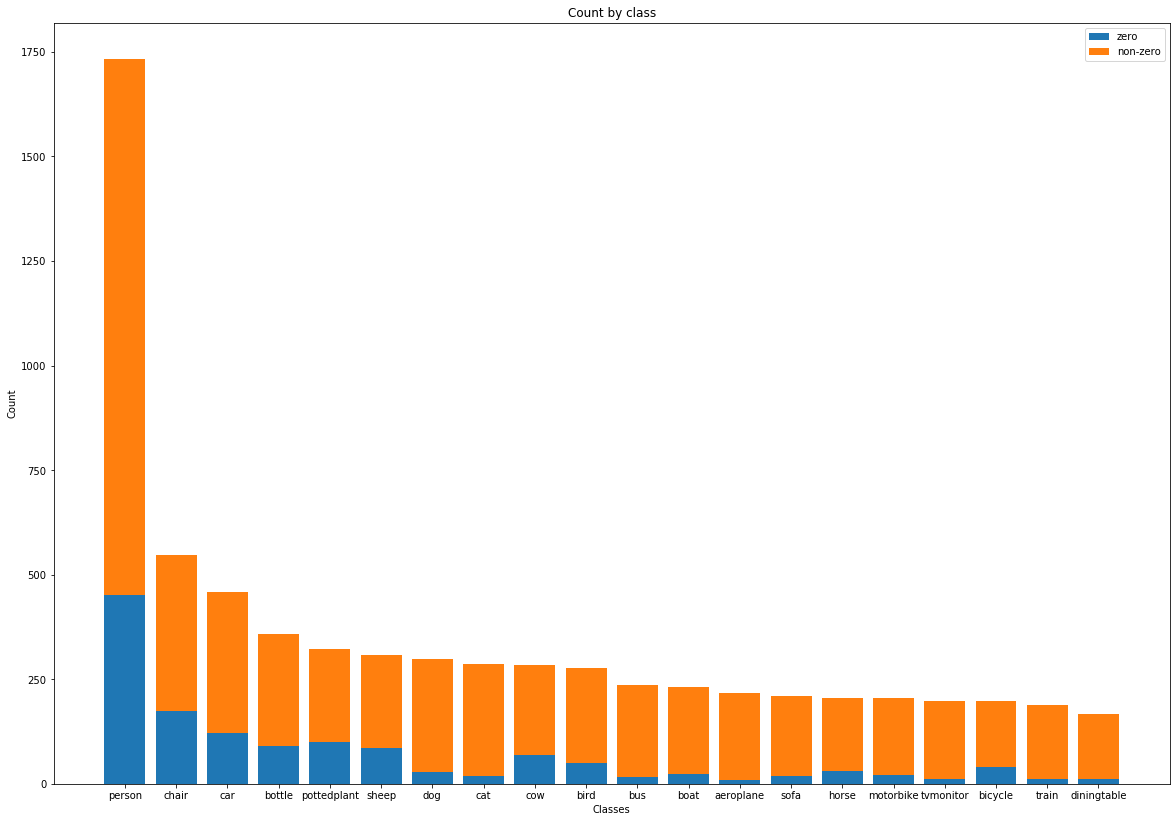

In [57]:
count_z = df_z.groupby(['Class']).size().reset_index(name='Count_z').set_index('Class')
count_nz = df_nz.groupby(['Class']).size().reset_index(name='Count_nz').set_index('Class')

count = pd.concat([count_z, count_nz], axis=1)
count['Count'] = count['Count_z'] + count['Count_nz']
count = count.sort_values(by=['Count'], ascending=False)

fig, ax = plt.subplots()

ax.bar(count.index, count['Count_z'], label='zero')
ax.bar(count.index, count['Count_nz'], bottom = count['Count_z'], label='non-zero')

ax.set_ylabel('Count')
ax.set_xlabel('Class')
ax.set_title('Count by class')
ax.legend()

plt.show()
fig.savefig("Figures/Count_by_class.jpg")

In [ ]:
# Mean difficulty by class
# Mean area by class
# Ratio zero / total by class
# Ratio zero / total by difficulty
# mIoU by difficulty
# mIoU by area

No handles with labels found to put in legend.


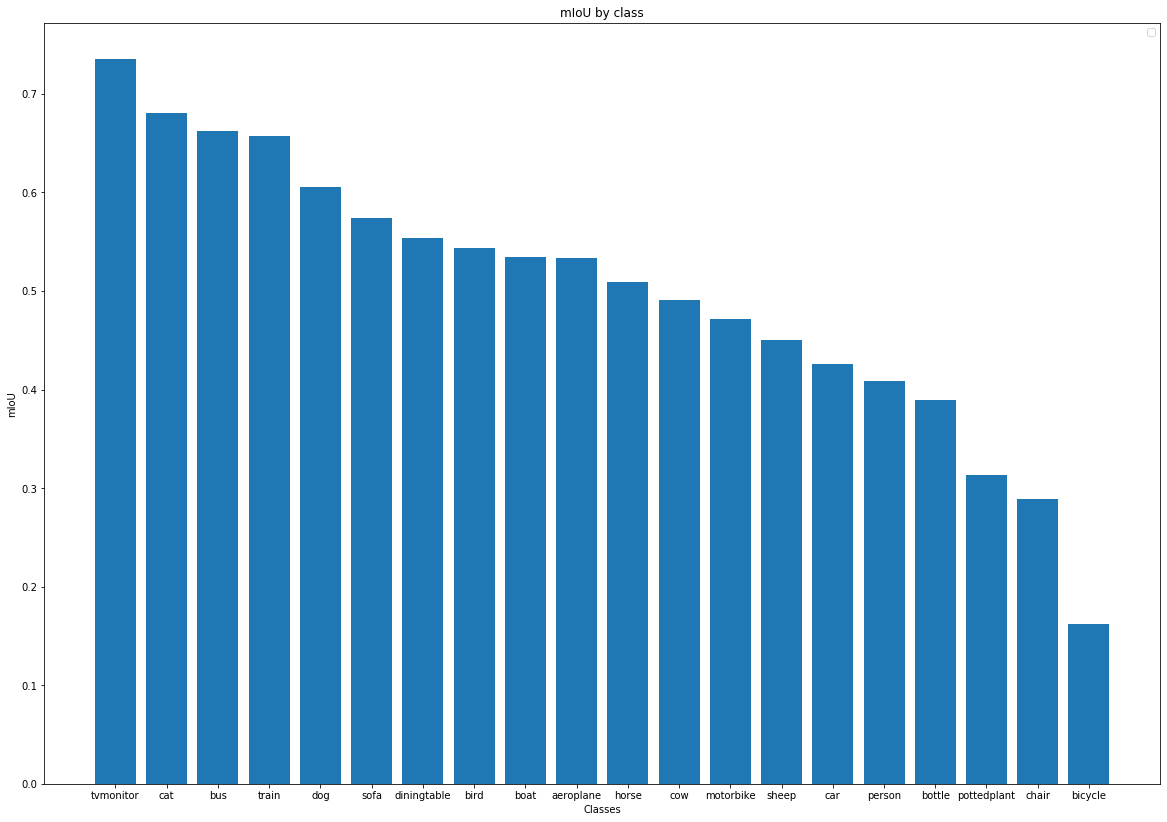

In [43]:
mIoU = df.groupby(['Class']).mean()
mIoU = mIoU.sort_values(by=['IoU'], ascending=False)

fig, ax = plt.subplots()

ax.bar(mIoU.index, mIoU['IoU'])
ax.set_ylabel('mIoU')
ax.set_xlabel('Class')
ax.set_title('mIoU by class')
ax.legend()

plt.show()
fig.savefig("Figures/mIoU_by_class.jpg")

In [68]:
#area1, IoU1 = zip(*sorted(zip(df['Area'].tolist(), df['IoU'].tolist()), reverse=True))
#plt.scatter(area1, IoU1)
#plt.show()

In [79]:
gb = df.groupby(pd.cut(df["Area"], np.linspace(df['Area'].min(), df['Area'].max(), num=21)))

area_bin = gb.size().to_frame(name='Count')
area_bin = area_bin.join(gb.agg(['mean'])).reset_index()

C:\Users\Nicol\Miniconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


In [81]:
area_bin.columns.values[2] = "mIoU"
area_bin.columns.values[3] = "mDifficulty"
area_bin.columns.values[4] = "mArea"

                    Area  Count  mIoU  mDifficulty      mArea
0        (14.0, 11041.2]   2602 0.279        0.244   3898.467
1     (11041.2, 22068.4]    977 0.467        0.079  15966.163
2     (22068.4, 33095.6]    666 0.541        0.045  27428.386
3     (33095.6, 44122.8]    526 0.576        0.044  38596.905
4     (44122.8, 55150.0]    398 0.569        0.040  49793.696
5     (55150.0, 66177.2]    359 0.602        0.033  60413.535
6     (66177.2, 77204.4]    266 0.659        0.030  71719.538
7     (77204.4, 88231.6]    254 0.647        0.028  82434.677
8     (88231.6, 99258.8]    202 0.692        0.020  93249.743
9    (99258.8, 110286.0]    169 0.650        0.024 104480.716
10  (110286.0, 121313.2]    109 0.661        0.018 115240.257
11  (121313.2, 132340.4]     94 0.674        0.000 126479.723
12  (132340.4, 143367.6]     81 0.686        0.086 137583.062
13  (143367.6, 154394.8]     74 0.656        0.068 148996.176
14  (154394.8, 165422.0]     57 0.686        0.035 160292.000
15  (165

No handles with labels found to put in legend.


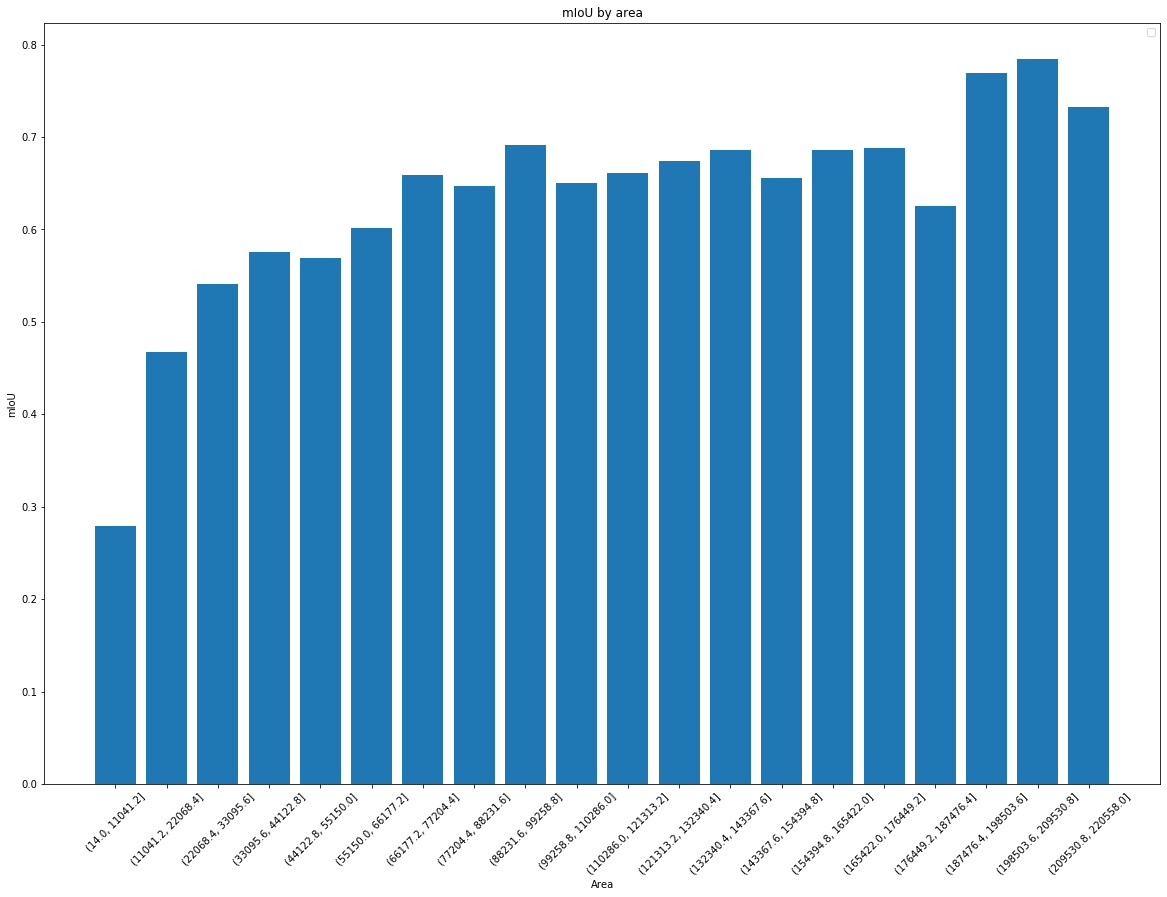

In [94]:
fig, ax = plt.subplots()

ax.bar(area_bin['Area'].astype(str), area_bin['mIoU'])
ax.set_ylabel('mIoU')
ax.set_xlabel('Area')
ax.set_title('mIoU by area')
plt.xticks(rotation=45)
ax.legend()

plt.show()
fig.savefig("Figures/mIoU_by_area.jpg")